In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%load_ext bigquery_magics

In [34]:
%%bigquery posts_detailed
SELECT * FROM `llm-studies.blog.posts_detailed`

Query is running:   0%|          |

Downloading:   0%|          |

In [35]:
posts_detailed

,classification,post_title,post_date,post_url,justification
0,Epistemologia,Genealogia e Arqueologia [i],2018-12-20,http://www.reflexoesdofilosofo.blog.br/2018/12...,O texto se concentra em analisar a relação ent...
1,Política,O deus brasileiro é fake,2018-10-29,http://www.reflexoesdofilosofo.blog.br/2018/10...,O texto analisa criticamente a eleição de Jair...
2,Liberdade,Que é escrever?*,2018-10-14,http://www.reflexoesdofilosofo.blog.br/2018/10...,O texto se concentra na análise da liberdade a...
3,Epistemologia,Intersecção,2018-09-22,http://www.reflexoesdofilosofo.blog.br/2018/09...,"O texto explora a relação entre o escritor, o ..."
4,Crônica,bichinho perdido,2018-09-12,http://www.reflexoesdofilosofo.blog.br/2018/09...,O texto apresenta uma narrativa ficcional sobr...
...,...,...,...,...,...
430,Educação,Didática e Pedagogia do Exame*,2019-03-24,http://www.reflexoesdofilosofo.blog.br/2019/03...,O texto discute criticamente a prática da aval...
431,Linguagem,Como resolver problemas filosóficos*,2019-02-27,http://www.reflexoesdofilosofo.blog.br/2019/02...,O texto se concentra em analisar a relação ent...
432,Epistemologia,O pragmatismo de Putnam[1],2019-01-30,http://www.reflexoesdofilosofo.blog.br/2019/01...,O texto discute a perspectiva de Putnam sobre ...
433,Ética,Fé na Festa*,2019-01-05,http://www.reflexoesdofilosofo.blog.br/2019/01...,"O texto analisa a obra de Byung-Chul Han, um f..."


In [7]:
posts_detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   classification  206 non-null    object
 1   post_title      206 non-null    object
 2   post_date       206 non-null    dbdate
 3   post_url        206 non-null    object
 4   justification   206 non-null    object
dtypes: dbdate(1), object(4)
memory usage: 8.2+ KB


In [36]:
posts_detailed.describe(include=["object", "bool"])

,classification,post_title,post_url,justification
count,435,435,435,435
unique,18,435,435,435
top,Epistemologia,Lé com cré,http://www.reflexoesdofilosofo.blog.br/2018/12...,O texto apresenta uma reflexão sobre a vida e ...
freq,125,1,1,1


In [29]:
%config InlineBackend.figure_format = 'retina'
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

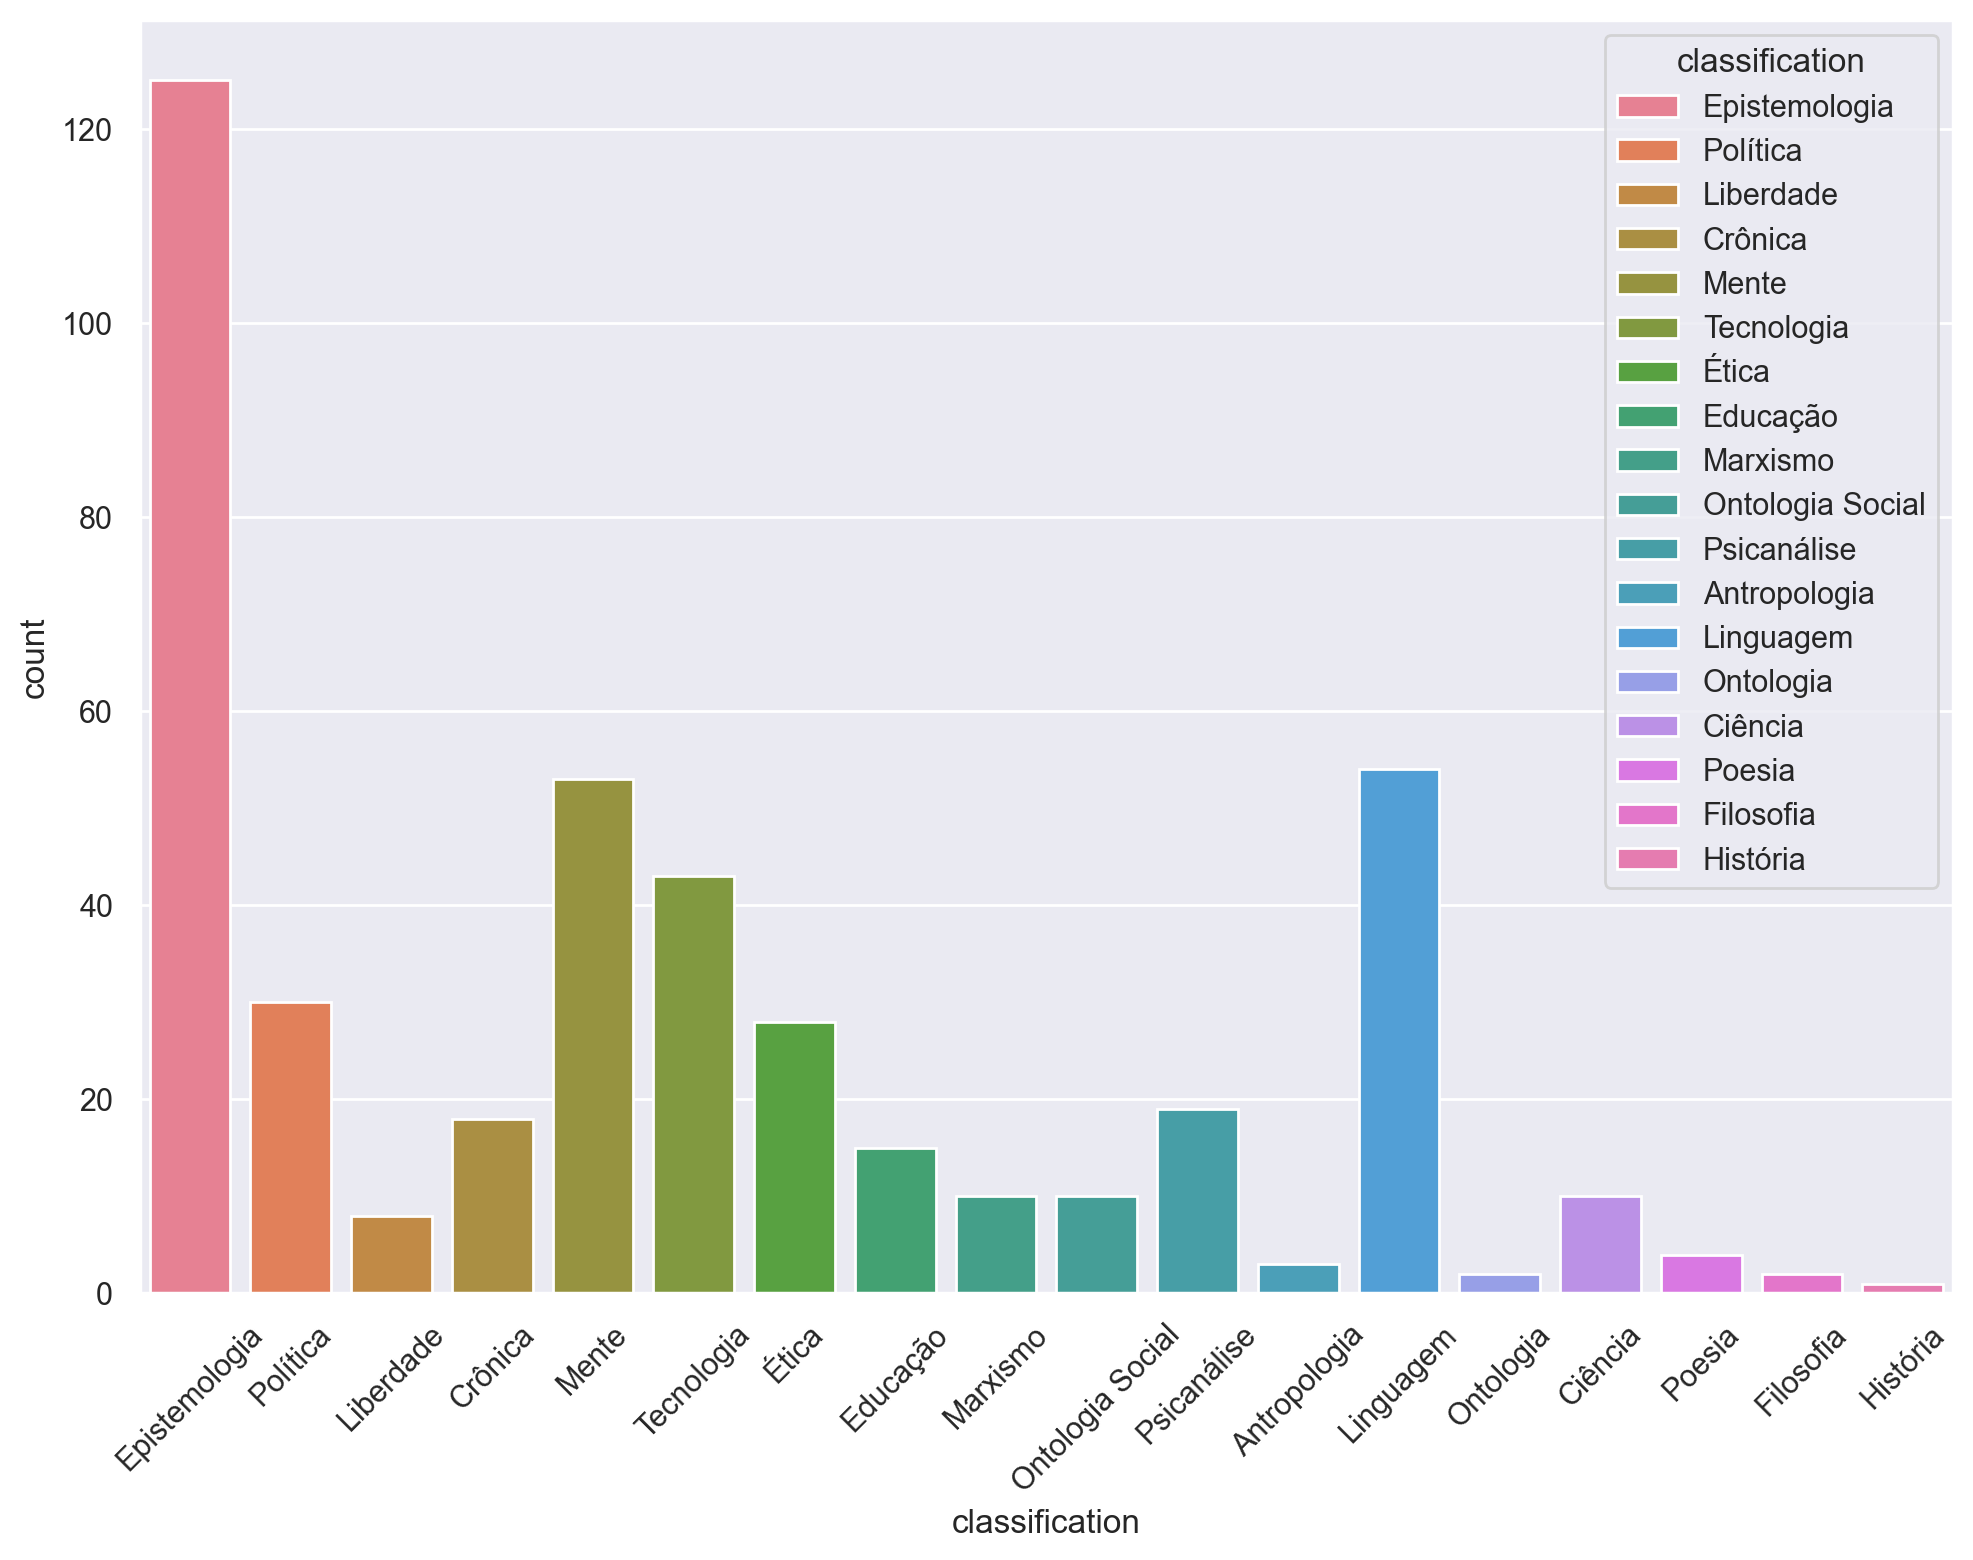

In [37]:
plot = sns.countplot(x="classification", hue="classification", data=posts_detailed, legend=True);
plt.setp(plot.get_xticklabels(), rotation=45)

In [38]:
%%bigquery rag
SELECT query.query, base.content, base.statistics, distance
FROM
  VECTOR_SEARCH(
    TABLE blog.posts_dez_2024_emb,
    'text_embedding',
    ( SELECT ml_generate_embedding_result, content AS query
  FROM ML.GENERATE_EMBEDDING(
  MODEL blog.text_emb,
  (SELECT 'improving password security' AS content))
),
    top_k => 2);

Query is running:   0%|          |

Downloading:   0%|          |

C:\Users\A450373\OneDrive - ATOS\source-code\pessoal\blog-api-2024\.venv\Lib\site-packages\google\cloud\bigquery\_pandas_helpers.py:208: UserWarning: Unable to determine Arrow type for field 'statistics'.
  warnings.warn(


In [39]:
rag

,query,content,statistics,distance
0,improving password security,_Trata da promiscuidade e ambivalência no ecos...,"{'token_count': 5228, 'truncated': True}",1.15531
1,improving password security,"Após o advento da internet, que quebrou todos ...","{'token_count': 1844, 'truncated': False}",1.16648
